<a href="https://colab.research.google.com/github/Navin321-alma/EDA-IPL-Cricket-Data-Analysis/blob/main/self_notebook_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

The Indian Premier League (IPL) is a domestic, annual Twenty20 cricket tournament in India, organized by the IPL Governing Council, under the aegis of the Board of Control for Cricket in India (BCCI). It is the most watched Twenty20 tournament and the second-best paying sporting league globally. IPL was established in 2008 and currently consists of eight teams in eight cities across India.

#loading libraries
Let us begin our analysis by loading the Python Modules/Packages/Libraries.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading input dataset
In order to read the input data, let us first define the directory/path in which the input file is present. This is to make sure that the path is stored in a string first before using the same (concatenated) with the file name to read the input csv using pd.read_csv() function




In [ ]:
directory_path_1 = '/content/drive/My Drive/capstone_projects/deliveries.csv'
deliveries_df = pd.read_csv(directory_path_1)
directory_path_2 = '/content/drive/My Drive/capstone_projects/matches.csv'
matches_df = pd.read_csv(directory_path_2)
directory_path_3 = '/content/drive/My Drive/capstone_projects/most_runs_average_strikerate.csv'
most_runs_average_strikerate_df = pd.read_csv(directory_path_3)
directory_path_4 = '/content/drive/My Drive/capstone_projects/Players.xlsx'
players_df = pd.read_excel(directory_path_4)
directory_path_5 = '/content/drive/My Drive/capstone_projects/teams.csv'
teams_df = pd.read_csv(directory_path_5)
directory_path_6 = '/content/drive/My Drive/capstone_projects/teamwise_home_and_away.csv'
teamwise_home_and_away_df = pd.read_csv(directory_path_6)

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
deliveries_df.drop(['player_dismissed','dismissal_kind','fielder'],inplace=True,axis= 1 )
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [ ]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#So there are 756 rows and 18 columns. 756 rows imply that there were 756 IPL matches held between 2008 - 2019.

In [ ]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
new_matches_df = matches_df.fillna(0)
new_matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0


In [ ]:
new_matches_df.rename(columns= {'player_of_match':'man_of_the_match','dl_applied':'dls_applied'},inplace=True	)
new_matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dls_applied,winner,win_by_runs,win_by_wickets,man_of_the_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0


#**1. How many times the team wins (if they choose field or bat)**

In [ ]:
teams = new_matches_df['toss_winner'].unique()

decision = pd.DataFrame([],columns = ['Toss_winner','bat_wins','field_wins'])
for id ,elem in enumerate(teams):
  choose_bat = matches_df[(matches_df['toss_winner']== elem) & (matches_df['toss_decision']== 'bat')]
  choose_field =  matches_df[(matches_df['toss_winner']== elem) & (matches_df['toss_decision']== 'field')]

  decision= decision.append({'Toss_winner':elem,'field_wins':choose_field['toss_winner'].count(),'bat_wins':choose_bat['toss_winner'].count()},ignore_index = True)
  

In [ ]:
ab = decision.sort_values(by = 'bat_wins',ascending = False)
ab

,Toss_winner,bat_wins,field_wins
8,Chennai Super Kings,48,41
5,Mumbai Indians,44,54
9,Rajasthan Royals,32,48
2,Kolkata Knight Riders,30,62
7,Delhi Daredevils,29,51
3,Kings XI Punjab,26,55
10,Deccan Chargers,24,19
0,Royal Challengers Bangalore,20,61
4,Sunrisers Hyderabad,20,26
12,Pune Warriors,11,9


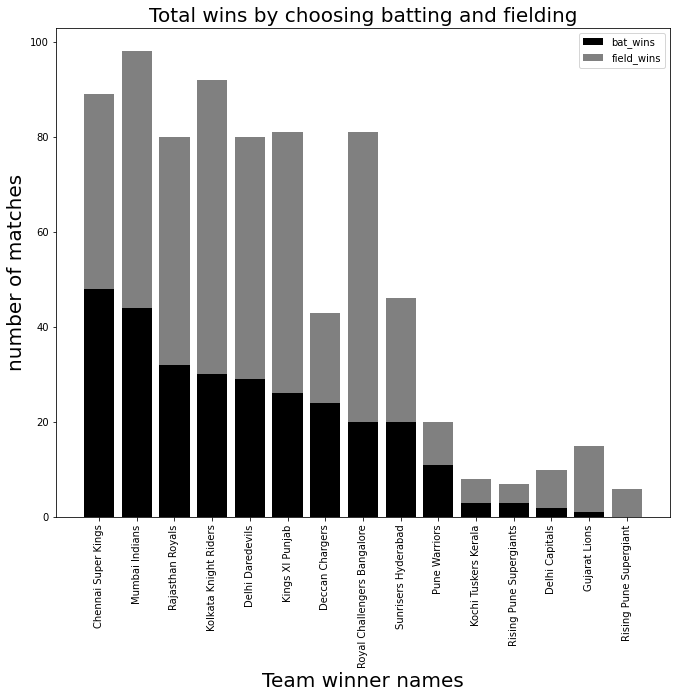

In [ ]:
x = ab['Toss_winner']
y1 = ab['bat_wins']
y2 = ab['field_wins']

plt.bar(x,y1 , color='black')
plt.bar(x,y2, bottom=y1, color='grey')
plt.rcParams['figure.figsize'] = (11, 9)
plt.xticks(rotation = 90)
plt.legend(['bat_wins','field_wins'])
plt.title('Total wins by choosing batting and fielding',{'fontsize':20,'fontweight':25})
plt.xlabel('Team winner names',{'fontsize':20,'fontweight':25})
plt.ylabel('number of matches',{'fontsize':20,'fontweight':25})
plt.show()

# **2. what is the overall winning of each team**

In [ ]:
ipl_winner= new_matches_df.groupby('Season')['winner'].value_counts()
ipl_winner
  

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
          0                               1
Name: winner, Length: 103, dtype: int64

In [ ]:
wins_df = new_matches_df['winner'].value_counts()
wins_df

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
0                                4
Name: winner, dtype: int64

Text(0, 0.5, 'number of matches won')

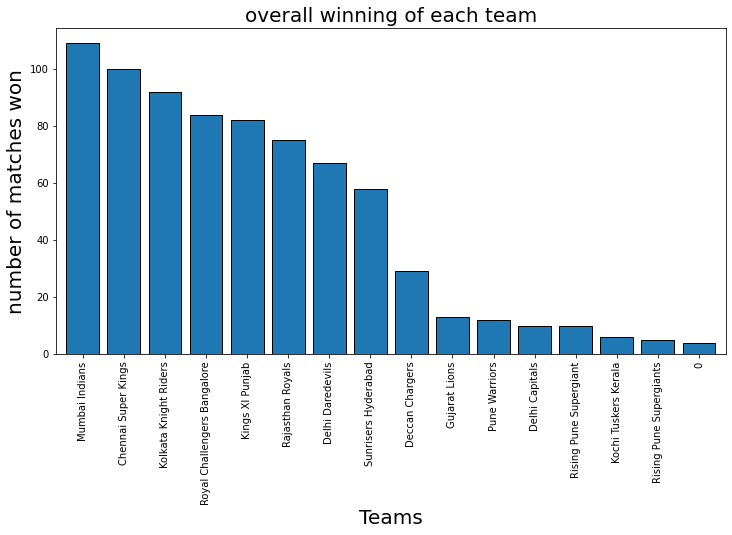

In [ ]:
ab = wins_df.plot.bar(width=0.8,linewidth=1,edgecolor='black',figsize = (12,6),fontsize = 10)
ab.set_title('overall winning of each team',{'fontsize':20,'fontweight':25})
ab.set_xlabel('Teams',{'fontsize':20,'fontweight':25})
ab.set_ylabel('number of matches won',{'fontsize':20,'fontweight':25})


# **3. Find the Top 5 cities which held the total number of matches**

In [ ]:
new_matches_df['city'].unique().size

33

Total number of cities are 33

Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Name: city, dtype: int64


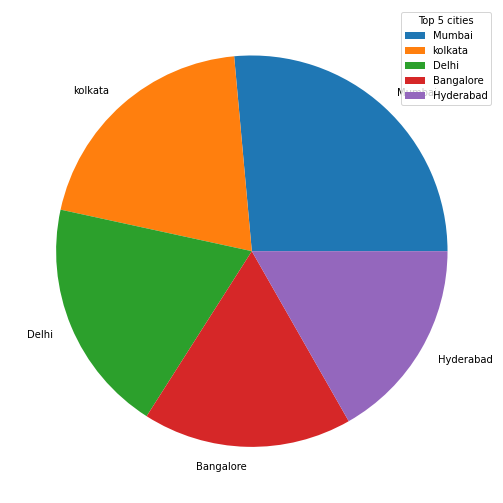

In [ ]:
city_wise_matches = new_matches_df['city'].value_counts().head()
print(city_wise_matches)
my_labels = ["Mumbai","kolkata","Delhi","Bangalore","Hyderabad"]
plt.pie(city_wise_matches,labels=my_labels)
plt.legend(title = 'Top 5 cities')
plt.show()

# **4. what is the maximum winning of each team (by runs and wickets)**

In [ ]:
teams_df

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


There are  15 teams in ipl twenty-20

In [ ]:
team_wise_wins = new_matches_df.groupby(['winner'])[['win_by_runs', 'win_by_wickets']].max().sort_values(by='win_by_runs',ascending = False)
team_wise_wins

,win_by_runs,win_by_wickets
winner,,
Mumbai Indians,146,10
Royal Challengers Bangalore,144,10
Kolkata Knight Riders,140,10
Sunrisers Hyderabad,118,10
Kings XI Punjab,111,10
Rajasthan Royals,105,10
Chennai Super Kings,97,10
Delhi Daredevils,97,10
Deccan Chargers,82,10


Text(0, 0.5, 'runs and wicket values')

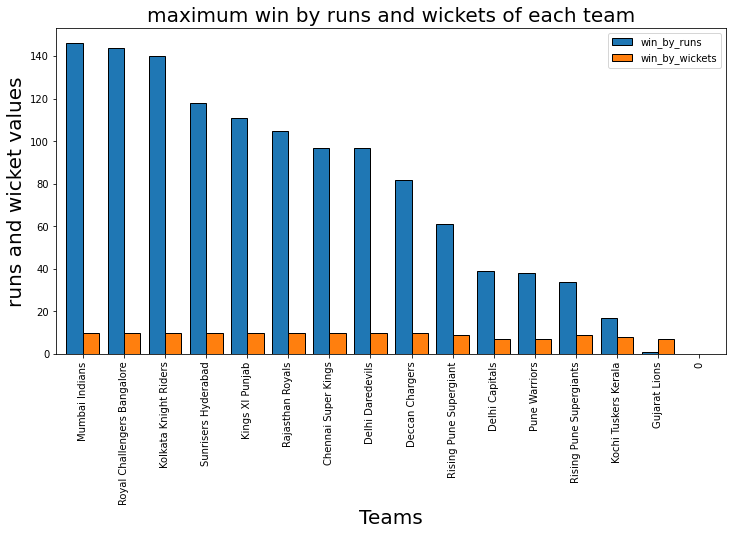

In [ ]:
ab = team_wise_wins.plot.bar(width=0.8,linewidth=1,edgecolor='black',figsize = (12,6),fontsize = 10)
ab.set_title('maximum win by runs and wickets of each team',{'fontsize':20,'fontweight':25})
ab.set_xlabel('Teams',{'fontsize':20,'fontweight':25})
ab.set_ylabel('runs and wicket values',{'fontsize':20,'fontweight':25})

# **5. Print the top ten man of the match players in IPL**

In [ ]:
new_matches_df['man_of_the_match'].value_counts()

CH Gayle           21
AB de Villiers     20
RG Sharma          17
MS Dhoni           17
DA Warner          17
                   ..
JD Ryder            1
AA Jhunjhunwala     1
AD Mathews          1
MA Starc            1
K Rabada            1
Name: man_of_the_match, Length: 227, dtype: int64

Text(0, 0.5, 'player names')

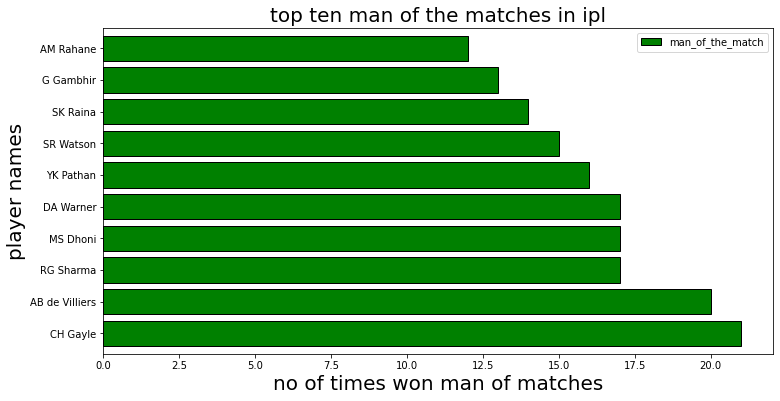

In [ ]:
matches_df_ = new_matches_df['man_of_the_match'].value_counts()
top_ten_player_of_matches_df = matches_df_.head(10)
ab = top_ten_player_of_matches_df.plot.barh(width=0.8,color = 'green',
      linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,)
plt.legend()
ab.set_title('top ten man of the matches in ipl',{'fontsize':20,'fontweight':25})
ab.set_xlabel('no of times won man of matches',{'fontsize':20,'fontweight':25})
ab.set_ylabel('player names',{'fontsize':20,'fontweight':25})